In [1]:
import splusdata

In [2]:
conn = splusdata.Core()

In [ ]:
tab = conn.query("""
    SELECT ra, dec, r_auto, g_auto, i_auto, z_auto, u_auto,
    r_pstotal, g_pstotal, i_pstotal, z_pstotal, u_pstotal
    FROM idr5.idr5_dual 
    WHERE r_auto < 19.0 AND r_auto > 13.0
    AND 
    RA > -50 AND RA < 50
    AND
    DEC > -1.4 AND DEC < 1.4
""")

In [ ]:
from dask.distributed import Client

client = Client(n_workers=10, memory_limit="8GB")
print(client)

In [46]:
from panstars_query import ps1cone, ps1metadata

In [ ]:
pantab = ps1cone(0, 0, 1, columns=["raMean", "decMean", "gMeanPSFMag", "rMeanPSFMag", "iMeanPSFMag", "zMeanPSFMag"], release="dr2")

In [15]:
from upath import UPath
import lsdb

In [47]:
pan_starts = lsdb.read_hats(UPath('s3://stpubdata/panstarrs/ps1/public/hats/otmo', anon=True), margin_cache=UPath('s3://stpubdata/panstarrs/ps1/public/hats/otmo_10arcs', anon=True))

In [48]:
splus_tab = lsdb.from_dataframe(tab.to_pandas(), ra_column="RA", dec_column="DEC")

In [49]:
match = pan_starts.crossmatch(
    splus_tab,
).compute()

KeyboardInterrupt: 

In [22]:
match

,objName_otmo,objNameHMS_otmo,objAltName1_otmo,objAltName2_otmo,objAltName3_otmo,objPopularName_otmo,objID_otmo,uniquePspsOBid_otmo,ippObjID_otmo,surveyID_otmo,htmID_otmo,zoneID_otmo,tessID_otmo,projectionID_otmo,skyCellID_otmo,randomID_otmo,batchID_otmo,dvoRegionID_otmo,processingVersion_otmo,objInfoFlag_otmo,astrometryCorrectionFlag_otmo,qualityFlag_otmo,raStack_otmo,decStack_otmo,raStackErr_otmo,decStackErr_otmo,raMean_otmo,decMean_otmo,raMeanErr_otmo,decMeanErr_otmo,pmra_otmo,pmdec_otmo,pmraErr_otmo,pmdecErr_otmo,epochMean_otmo,posMeanChisq_otmo,cx_otmo,cy_otmo,cz_otmo,lambda_otmo,beta_otmo,l_otmo,b_otmo,nStackObjectRows_otmo,nStackDetections_otmo,nDetections_otmo,ng_otmo,nr_otmo,ni_otmo,nz_otmo,ny_otmo,gQfPerfect_otmo,gMeanPSFMag_otmo,gMeanPSFMagErr_otmo,gMeanPSFMagStd_otmo,gMeanPSFMagNpt_otmo,gMeanPSFMagMin_otmo,gMeanPSFMagMax_otmo,gMeanKronMag_otmo,gMeanKronMagErr_otmo,gMeanKronMagStd_otmo,gMeanKronMagNpt_otmo,gMeanApMag_otmo,gMeanApMagErr_otmo,gMeanApMagStd_otmo,gMeanApMagNpt_otmo,gFlags_otmo,rQfPerfect_otmo,rMeanPSFMag_otmo,rMeanPSFMagErr_otmo,rMeanPSFMagStd_otmo,rMeanPSFMagNpt_otmo,rMeanPSFMagMin_otmo,rMeanPSFMagMax_otmo,rMeanKronMag_otmo,rMeanKronMagErr_otmo,rMeanKronMagStd_otmo,rMeanKronMagNpt_otmo,rMeanApMag_otmo,rMeanApMagErr_otmo,rMeanApMagStd_otmo,rMeanApMagNpt_otmo,rFlags_otmo,iQfPerfect_otmo,iMeanPSFMag_otmo,iMeanPSFMagErr_otmo,iMeanPSFMagStd_otmo,iMeanPSFMagNpt_otmo,iMeanPSFMagMin_otmo,iMeanPSFMagMax_otmo,iMeanKronMag_otmo,iMeanKronMagErr_otmo,iMeanKronMagStd_otmo,iMeanKronMagNpt_otmo,iMeanApMag_otmo,iMeanApMagErr_otmo,iMeanApMagStd_otmo,iMeanApMagNpt_otmo,iFlags_otmo,zQfPerfect_otmo,zMeanPSFMag_otmo,zMeanPSFMagErr_otmo,zMeanPSFMagStd_otmo,zMeanPSFMagNpt_otmo,zMeanPSFMagMin_otmo,zMeanPSFMagMax_otmo,zMeanKronMag_otmo,zMeanKronMagErr_otmo,zMeanKronMagStd_otmo,zMeanKronMagNpt_otmo,zMeanApMag_otmo,zMeanApMagErr_otmo,zMeanApMagStd_otmo,zMeanApMagNpt_otmo,zFlags_otmo,yQfPerfect_otmo,yMeanPSFMag_otmo,yMeanPSFMagErr_otmo,yMeanPSFMagStd_otmo,yMeanPSFMagNpt_otmo,yMeanPSFMagMin_otmo,yMeanPSFMagMax_otmo,yMeanKronMag_otmo,yMeanKronMagErr_otmo,yMeanKronMagStd_otmo,yMeanKronMagNpt_otmo,yMeanApMag_otmo,yMeanApMagErr_otmo,yMeanApMagStd_otmo,yMeanApMagNpt_otmo,yFlags_otmo,Norder_otmo,Dir_otmo,Npix_otmo,RA_from_lsdb_dataframe,DEC_from_lsdb_dataframe,r_auto_from_lsdb_dataframe,g_auto_from_lsdb_dataframe,i_auto_from_lsdb_dataframe,z_auto_from_lsdb_dataframe,Norder_from_lsdb_dataframe,Dir_from_lsdb_dataframe,Npix_from_lsdb_dataframe,_dist_arcsec
_healpix_29,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1224820670213986963,PSO J000.3242-00.9367,PSX J000117.79-005612.0,-999,-999,-999,-999,106870003241406420,3481534000075629,361846699796333,0,8796220946688,10687,1,1232,74,0.513554,3481534,84249,3,512024576,7,61,0.324131,-0.936646,0.001,0.001,0.324162,-0.936679,0.001484,0.001484,12.236861,-0.133622,1.050553,1.050553,55845.443734,11.637387,0.99985,0.005657,-0.016347,359.924787,-0.988328,96.179835,-61.176736,-999,5,68,10,19,15,12,12,0.999532,20.316999,0.024417,0.060549,6,20.2414,20.4074,19.4056,0.134963,0.326943,9,19.6553,0.037138,0.092527,9,16892216,0.99941,19.0884,0.044022,0.081682,11,19.0137,19.256201,17.7969,0.016109,0.206054,17,18.3398,0.032599,0.116244,17,16892216,0.999261,18.566299,0.01753,0.037503,6,18.506599,18.604799,17.2787,0.005165,0.021566,11,17.934,0.023767,0.094518,11,16892216,0.999556,18.0676,0.032319,0.096174,9,17.930599,18.2171,17.0224,0.009237,0.041476,12,17.3484,0.029883,0.099134,12,16892216,0.99964,17.8834,0.029653,0.120312,11,17.793501,18.097799,16.9753,0.020882,0.069111,12,17.242001,0.028966,0.100043,12,16892216,6,10000,17405,0.324137,-0.936662,17.39085,18.790388,16.939516,16.665871,0,0,4,0.109187
1224820716683281273,PSO J000.3531-00.9165,PSX J000124.74-005459.5,-999,-999,-999,-999,106900003530400622,3481534000082475,361846699803179,0,8796187473757,10690,1,1232,74,0.753328,3481534,84249,3,503635968,7,60,0.353068,-0.9

In [24]:
import matplotlib.pyplot as plt

In [30]:
match["r_auto_from_lsdb_dataframe"]

_healpix_29
1224820670213986963     17.39085
1224820716683281273    16.288574
                         ...    
1369252744001940563    15.261034
1369252745743168000    14.907318
Name: r_auto_from_lsdb_dataframe, Length: 2558, dtype: float[pyarrow]

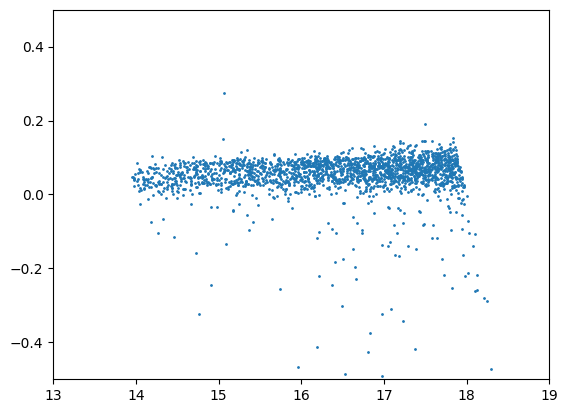

In [42]:
plt.scatter(
    
    match["rMeanPSFMag_otmo"],
    match["r_auto_from_lsdb_dataframe"] - match["rMeanPSFMag_otmo"], 
    s = 1
)
plt.ylim(-0.5, 0.5)
plt.xlim(13, 19)
plt.show()